# Importing necessary packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import io
import math
import pandas as pd
from sklearn.manifold import TSNE
import pickle
import seaborn as sns


# Visualizing Data 

In [8]:
class VisualizeData:
    def correlation_matrix(self,train_set):
        dataf=pd.DataFrame(train_set)
        print ("Correlation Matrix\n")
        print (np.array((np.round(dataf.corr(),decimals=1))))
        return True
    
    def load_data(self):                                      
        with open('train_image.pkl', 'rb') as f:
            train_set = pickle.load(f)          # Loading training featureset in train_set 
        with open('test_image.pkl', 'rb') as f:
            test_set = pickle.load(f)           # Loading testing featureset in test_set
        with open('train_label.pkl', 'rb') as f:
            train_label = pickle.load(f)        # Loading training labels in train_label 
        return train_set,test_set,train_label
        
    def Count_Unique_Labels(self,label):
        unique,counts=np.unique(label,return_counts=True)  # Count no of unique classes in training labels
        labelArr=np.asarray((unique,counts)).T             # labelArr -> class and class size  
        No_Of_Labels=labelArr.shape[0]                     # no. of classes 
        return labelArr,No_Of_Labels,unique                       
    
    def SNE_Scatterplot(self,train_set,train_label):
        X_em=TSNE(n_components=2).fit_transform(train_set)  # Mapping of dataset in 2 dimensions
        a1=np.array(train_label).reshape(np.array(train_label).shape[0],1)   # Reshaping train_label 
        Data=np.append(X_em,a1,axis=1)                      # Appending training features and labels together   

        col=['x1','x2','Class']
        df1=pd.DataFrame(Data,columns=col)                  # Creating a data frame for training set
    
        sns.set_context("notebook",font_scale=1.1)          # formatting of the plot 
        sns.set_style("ticks")                              
        
        # plotting the multidimensional dataset in 2-dimensional
        #space using seaborn plot function with labelled classes 
        
        sns.lmplot('x1','x2',data=df1,fit_reg=False,hue="Class",scatter_kws={"marker":"D","s":100}) 
        plt.title("2-Dimensional Representation of Training set ")
        plt.xlabel("x-axis")
        plt.ylabel("y-axis")
        
        plt.pause(0.0001)
        return True


Correlation Matrix

[[1.  0.5 0.1 ... 0.  0.  0.1]
 [0.5 1.  0.8 ... 0.1 0.1 0.1]
 [0.1 0.8 1.  ... 0.2 0.1 0.2]
 ...
 [0.  0.1 0.2 ... 1.  0.6 0.1]
 [0.  0.1 0.1 ... 0.6 1.  0.4]
 [0.1 0.1 0.2 ... 0.1 0.4 1. ]]
Class Distribution:
 [[   0 2000]
 [   2 2000]
 [   3 2000]
 [   6 2000]] 
 No of Labels:  4


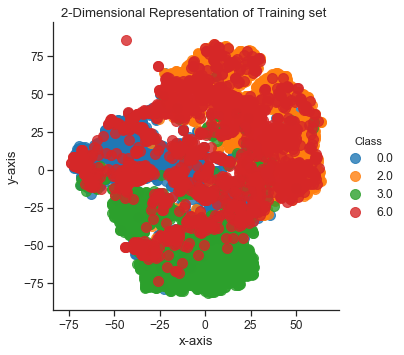

True

In [6]:
obj=VisualizeData()              # creating an object of VisualizeData class
train_set,test_set,train_label =obj.load_data()   # loading data 

obj.correlation_matrix(train_set)   

labelArr,No_Of_Labels,unique=obj.Count_Unique_Labels(train_label) # counting no of classes present in dataset
print("Class Distribution:\n",labelArr,"\n","No of Labels: ",No_Of_Labels)  
    
obj.SNE_Scatterplot(train_set,train_label) # Representation of dataset using sne 
    

# Implementing Naive Bayes' classifier 
#TrainNB for calculating priors and liklihood
#classifyNB for classification of test points
#Image dataset:
#Every feature value ranges from 0 to 255 ( a finite number of values).
#That is why, Multinomial NB is used as a classifier.
#There are 28*28 features    
#After observing correlation matrix between different features,
#Features are weakily correlated 
#So, I have used Naive Bayes as this is one of the simplest classifiers

In [21]:
class Multinomial_NaiveBayes():
        # Appending featureset and label together to form Training set
    def Append_Feature_Label(self,feature,label):  
        arr1=np.array(label).reshape((np.array(label).shape[0]),1)
        Data=np.append(feature,arr1,axis=1)
        return Data
    
    
    def Save_toCSV(self,Row,Output):                        
        Row_no=np.array(np.array(Row)).reshape(len(Row),1)
        Output=np.array(np.array(Output)).reshape(len(Output),1)
        test_label=np.append(Row_no,Output,axis=1)         
        
         # creating a data frame for test labels
        df=pd.DataFrame(test_label,columns=['Test_image_index','predicted class']) 
        df.to_csv("Sarika_Chaudhary.csv",index=False)      # generating a csv file for test labels
        
        print ("CSV file has been created!")
        return True
    
        
    def trainNB(self,TrainSet,No_Of_Labels,uniq_labels,labelArr):
        print ("\nTraining_function\n")
        cols=TrainSet.shape[1]                         # columns -> features
        rows=TrainSet.shape[0]                         # rows -> data points
        Label_prior=np.zeros((No_Of_Labels))           # class-priors
        Result=[]
        
        for i in range(No_Of_Labels):
            Label_prior[i]=(float)((float) (labelArr[i][1]) /(float) (rows) )   
            # class prior = class_size/total data pts
        
        for label in range(No_Of_Labels):    # for every class 
            p=TrainSet[ (TrainSet[:,cols-1] == uniq_labels[label])]         
            # fetch data points for a particular class
            p=p[:,0:-1]       # removing the label column from featureset
            xx=np.sum(p,axis=0)    # take the sum for each column/feature
            Result.append(xx)                                               
        return Result, Label_prior
    
    
    def classifyNB(self,Denom,Result,Label_prior,labels,Test,No_Of_Labels):
        print ("\nTest function\n")
        
        rowt=np.array(Test).shape[0]
        colt=np.array(Test).shape[1]
        rowno=[]
        Output=[]
        score=np.zeros((rowt,No_Of_Labels))   # to store individual scores for every class
                                             # because Naive Bayes is a generative classifier
        
        for row in range(rowt):       # for every test point
            maxm=-1
            ResultForLabels=[]
            
            for label in range(No_Of_Labels):
                ResultForLabel=math.log(Label_prior[label]) #laber_prior
                featureset=np.nonzero(Test[row][:])
                
                for feature in range(colt):
                    
                    nji=Result[label][feature]
                    nj=Denom[label]
                    
                    p=( math.log(nji+1) -math.log(nj+colt) )# with Smoothing factor (Laplace smoothning)
                                                  # colt= no of features
                    present=Test[row][feature]    # value of the feature in test point
                    term=p*present                               
                    ResultForLabel=ResultForLabel + term
                
                    if(ResultForLabel == 0):    # to check for 0 score for a class 
                        print ("term != 0 but rof=0,  prev r, term",r,term)
                        ResultForLabel=5e-324
                ResultForLabels.append(ResultForLabel)    
        
            maxm=np.max(ResultForLabels)
        
            for p in range(No_Of_Labels):
                if(maxm==ResultForLabels[p]):
                    set_label=p;      # set the Output label with maximum score
            Output.append(labels[set_label])
            rowno.append(row)
            
        return rowno,Output

# Calling Naive bayes and Creating CSV file

In [9]:
nb=Multinomial_NaiveBayes()
Training_set=nb.Append_Feature_Label(train_set,train_label)           #Training_set

Result, Label_prior=nb.trainNB(Training_set,No_Of_Labels,unique,labelArr)    #Calling trainNB

Denom=np.sum(Result,axis=1)

#Calling classify NB
Row,Output=nb.classifyNB(Denom,Result,Label_prior,unique,test_set,No_Of_Labels)

#creating a csv file
nb.Save_toCSV(Row,Output)


Training_function


Test function

CSV file has been created!


True